# **üîç Objetivo de esta etapa (Pre-Entrega 4)**
**En esta cuarta entrega se desarrolla un modelo de aprendizaje no supervisado
(clustering) para complementar el an√°lisis de la brecha salarial de g√©nero en Argentina.
El objetivo es identificar perfiles o grupos de trabajadores/as con caracter√≠sticas salariales similares, considerando variables como g√©nero, sector econ√≥mico y decil salarial, para explorar patrones de desigualdad no evidentes en an√°lisis supervisados.**

# **üìö Notebook: Clustering de Remuneraciones**

# **Clustering de Remuneraciones Laborales por G√©nero e Industria**

## Introducci√≥n

Este notebook aplica **aprendizaje no supervisado** para descubrir grupos de trabajadores/as con perfiles salariales similares, usando variables econ√≥micas del dataset `Remuneraciones.csv`.  
Se utiliza **KMeans** como algoritmo de clustering, luego de una exploraci√≥n y preparaci√≥n de los datos.

## Objetivo

- Identificar clusters o grupos naturales en la base de remuneraciones.
- Analizar las caracter√≠sticas de cada cluster.
- Explorar insights para pol√≠ticas salariales o estrategias de segmentaci√≥n.

---

## **üîó 1. Importar librer√≠as y cargar datos**

In [63]:
# Librer√≠as
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [64]:
from google.colab import drive
drive.mount('/content/drive')

# Configuraci√≥n visual
sns.set(style="whitegrid")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# üîç 2. An√°lisis Exploratorio (EDA) para Clustering

In [65]:
# Revisar informaci√≥n general del DataFrame
df.info()          # Muestra n√∫mero de filas, columnas, tipos y nulos
print(df.describe())  # Estad√≠sticas descriptivas de variables num√©ricas

# Convertir 'Periodo' a fecha datetime, considerando que el formato es mes-a√±o (ej: ene-96)
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%b-%y', errors='coerce')

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36708 entries, 0 to 36707
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Periodo    24510 non-null  datetime64[ns]
 1   Industria  36708 non-null  object        
 2   Genero     36708 non-null  object        
 3   Valor      36708 non-null  float64       
 4   A√±o        24510 non-null  float64       
 5   Mes        24510 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.7+ MB
                   Periodo          Valor           A√±o           Mes
count                24510   36708.000000  24510.000000  24510.000000
mean   2009-05-28 09:36:00   22792.400632   2008.939535      6.604651
min    1996-02-01 00:00:00     291.500000   1996.000000      2.000000
25%    2002-09-01 00:00:00    1239.950000   2002.000000      3.000000
50%    2009-06-01 00:00:00    3577.400000   2009.000000      6.000000
75%    2016-03-01 00:00

Periodo                Industria   Genero  Valor     A√±o  Mes
0        NaT  agricultura y ganaderia  Mujeres  380.2     NaN  NaN
1 1996-02-01  agricultura y ganaderia  Mujeres  406.8  1996.0  2.0
2 1996-03-01  agricultura y ganaderia  Mujeres  399.7  1996.0  3.0
3        NaT  agricultura y ganaderia  Mujeres  375.9     NaN  NaN
4 1996-05-01  agricultura y ganaderia  Mujeres  395.6  1996.0  5.0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36708 entries, 0 to 36707
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Periodo    24510 non-null  datetime64[ns]
 1   Industria  36708 non-null  object        
 2   Genero     36708 non-null  object        
 3   Valor      36708 non-null  float64       
 4   A√±o        24510 non-null  float64       
 5   Mes        24510 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 1.7+ MB
                   Periodo          Valor           A√±o           Mes
count                24510   36708.000000  24510.000000  24510.000000
mean   2009-05-28 09:36:00   22792.400632   2008.939535      6.604651
min    1996-02-01 00:00:00     291.500000   1996.000000      2.000000
25%    2002-09-01 00:00:00    1239.950000   2002.000000      3.000000
50%    2009-06-01 00:00:00    3577.400000   2009.000000      6.000000
75%    2016-03-01 00:00

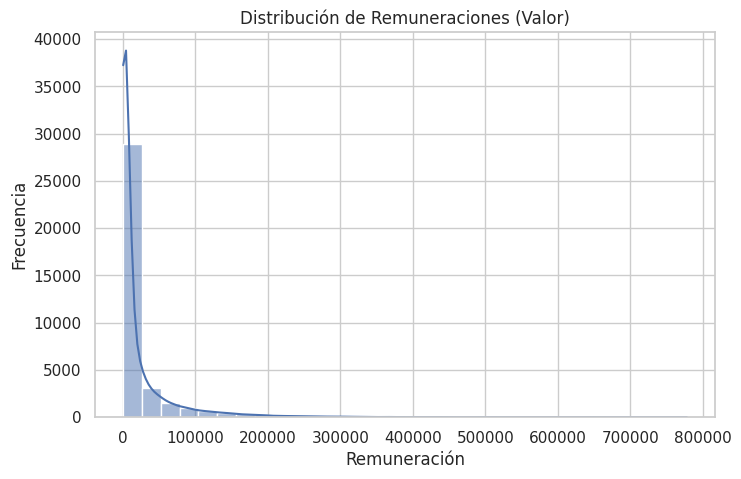

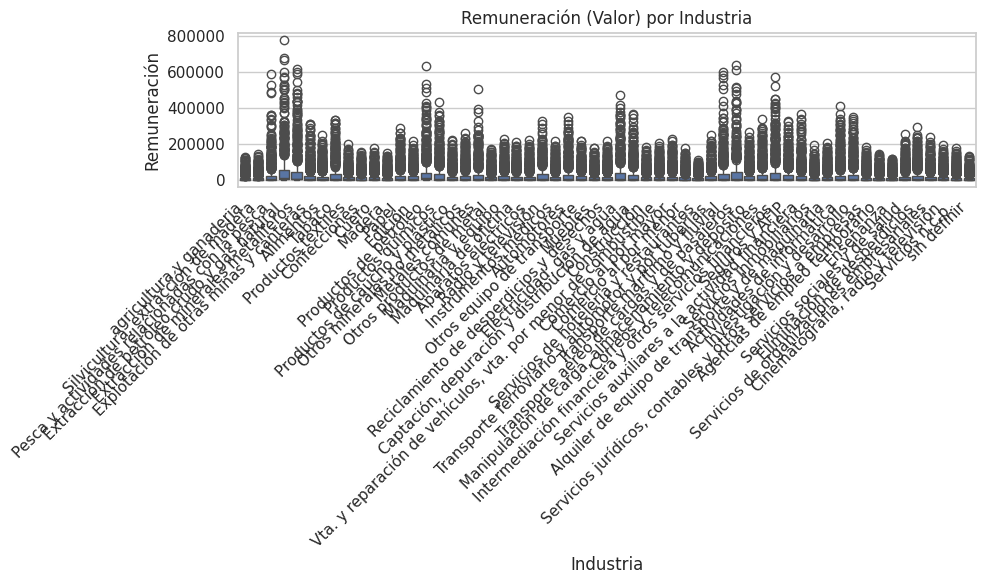

In [66]:
# Revisar info general
df.info()
print(df.describe())

# Distribuci√≥n de la variable Valor (remuneraci√≥n)
plt.figure(figsize=(8,5))
sns.histplot(df['Valor'], bins=30, kde=True)
plt.title("Distribuci√≥n de Remuneraciones (Valor)")
plt.xlabel("Remuneraci√≥n")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de Remuneraci√≥n por Industria
plt.figure(figsize=(10,6))
sns.boxplot(x='Industria', y='Valor', data=df)
plt.title("Remuneraci√≥n (Valor) por Industria")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Industria")
plt.ylabel("Remuneraci√≥n")
plt.tight_layout()
plt.show()


# ‚öôÔ∏è **3**. **Preprocesamiento**

In [67]:
# Convertir 'Periodo' a datetime
df['Periodo'] = pd.to_datetime(df['Periodo'], format='%b-%y', errors='coerce')

# Extraer a√±o y mes para usar num√©ricos
df['A√±o'] = df['Periodo'].dt.year
df['Mes'] = df['Periodo'].dt.month

# Seleccionar variables para clustering
# Por ahora solo num√©ricas: Valor, A√±o, Mes
variables = ['Valor', 'A√±o', 'Mes']

X = df[variables].dropna()  # eliminar filas con NaN (si las hay)

# Escalar variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled[:5]

array([[-0.4461454 , -1.6682759 , -1.51910905],
       [-0.44628626, -1.6682759 , -1.18920153],
       [-0.4463676 , -1.6682759 , -0.52938649],
       [-0.443225  , -1.6682759 , -0.19947897],
       [-0.44607993, -1.6682759 ,  0.13042855]])

# Opcional: codificar industria o g√©nero
Si quer√©s incluir variables categ√≥ricas en clustering, primero las convert√≠s a num√©ricas con one-hot encoding:**



In [68]:
df_dummy = pd.get_dummies(df[['Industria', 'Genero']], drop_first=True)

# Unir variables num√©ricas y dummies
X_full = pd.concat([df[variables], df_dummy], axis=1).dropna()

X_scaled_full = scaler.fit_transform(X_full)


# **üìà 4. Elegir n√∫mero √≥ptimo de clusters (M√©todo del Codo)**

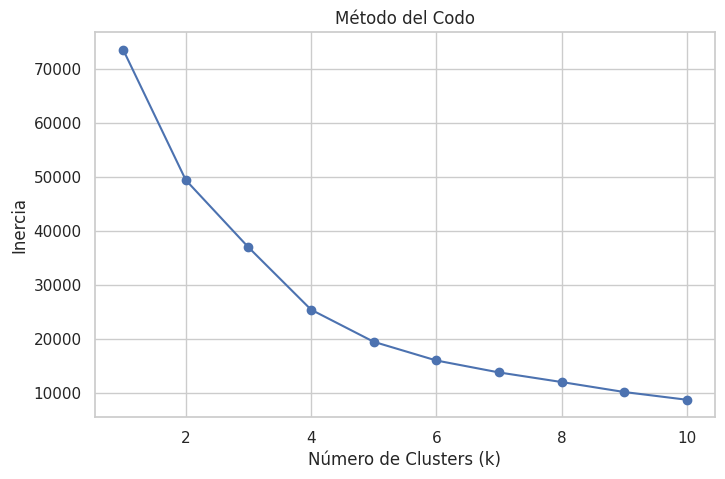

In [69]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('N√∫mero de Clusters (k)')
plt.ylabel('Inercia')
plt.title('M√©todo del Codo')
plt.show()


# **Interpretaci√≥n para elegir el k √≥ptimo:**
La curva muestra c√≥mo la inercia (suma de distancias cuadradas dentro de clusters) disminuye al aumentar el n√∫mero de clusters.

En general, buscamos un ‚Äúcodo‚Äù, es decir, un punto donde la reducci√≥n de inercia empieza a hacerse menos pronunciada.

En el gr√°fico, se ve que:

De k=1 a k=3 o 4 la inercia baja bastante r√°pido.

A partir de k=4 la disminuci√≥n se vuelve m√°s suave, menos pronunciada.

Entonces:

üîπ Un buen n√∫mero para k podr√≠a ser 3 o 4 clusters, porque despu√©s de eso la ganancia es menor.
üîπ Esto indica que con 3 o 4 grupos est√°s capturando la mayor parte de la estructura natural de los datos sin complicar mucho el modelo.



# **üî¢ 5. Aplicar KMeans con k √≥ptimo**

In [70]:
# -------------------------------
# 1Ô∏è‚É£ Subset sin nulos y escalado
# -------------------------------

variables = ['Valor', 'A√±o', 'Mes']

# Filtrar filas sin NaN
df_clust = df[variables].dropna().copy()

# Escalar variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clust)


In [71]:
# -------------------------------
# 2Ô∏è‚É£ Aplicar KMeans con k=4
# -------------------------------

from sklearn.cluster import KMeans

k = 4  # k √≥ptimo seg√∫n tu m√©todo del codo
kmeans = KMeans(n_clusters=k, random_state=42)
df_clust['Cluster'] = kmeans.fit_predict(X_scaled)

print("\nPrimeras filas con cluster asignado:")
print(df_clust.head())





Primeras filas con cluster asignado:
   Valor     A√±o  Mes  Cluster
1  406.8  1996.0  2.0        1
2  399.7  1996.0  3.0        1
4  395.6  1996.0  5.0        1
5  554.0  1996.0  6.0        1
6  410.1  1996.0  7.0        1


In [72]:
# -------------------------------
# 3Ô∏è‚É£ An√°lisis estad√≠stico por cluster
# -------------------------------

cluster_summary = df_clust.groupby('Cluster').mean().round(2)
print("\nPromedios por Cluster:")
print(cluster_summary)

print("\nCantidad de observaciones por Cluster:")
print(df_clust['Cluster'].value_counts())

# -------------------------------



Promedios por Cluster:
             Valor      A√±o   Mes
Cluster                          
0          9219.09  2007.57  9.83
1          1609.77  2002.25  4.49
2        177930.73  2021.13  7.11
3         28687.68  2015.61  4.65

Cantidad de observaciones por Cluster:
Cluster
0    8732
1    7630
3    6576
2    1572
Name: count, dtype: int64


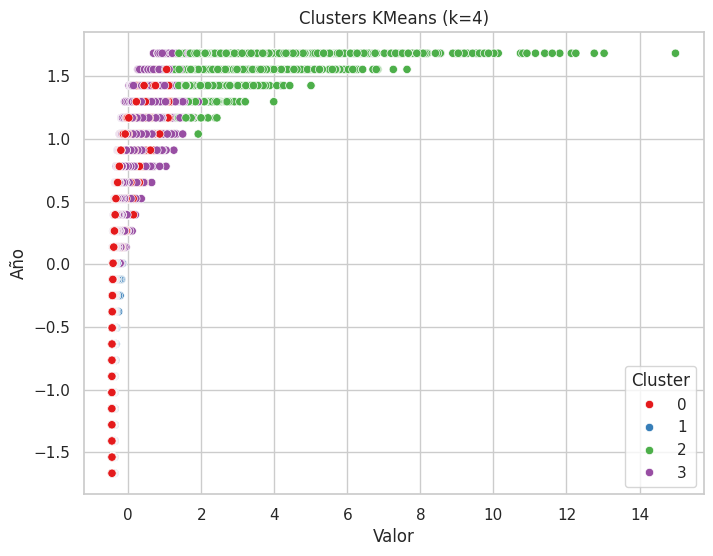

In [73]:
# 4Ô∏è‚É£ Visualizaci√≥n 2D
# -------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:, 0],   # Valor (remuneraci√≥n)
    y=X_scaled[:, 1],   # A√±o
    hue=df_clust['Cluster'],
    palette='Set1'
)
plt.title(f"Clusters KMeans (k={k})")
plt.xlabel(variables[0])
plt.ylabel(variables[1])
plt.show()


In [74]:
# -------------------------------
# 5Ô∏è‚É£ Puntaje de Silueta
# -------------------------------

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df_clust['Cluster'])
print(f"\nPuntaje de Silueta: {sil_score:.2f}")


Puntaje de Silueta: 0.37


# **üìä 6. An√°lisis de Clusters**

In [75]:
# -----------------------------------------
# An√°lisis descriptivo por cluster
# -----------------------------------------

# Promedios de las variables num√©ricas por grupo
cluster_summary = df_clust.groupby('Cluster')[['Valor', 'A√±o', 'Mes']].mean().round(2)
print("\nüîç Promedios por Cluster:")
print(cluster_summary)

# Tama√±o de cada cluster
print("\nüìä Cantidad de observaciones por Cluster:")
print(df_clust['Cluster'].value_counts())



üîç Promedios por Cluster:
             Valor      A√±o   Mes
Cluster                          
0          9219.09  2007.57  9.83
1          1609.77  2002.25  4.49
2        177930.73  2021.13  7.11
3         28687.68  2015.61  4.65

üìä Cantidad de observaciones por Cluster:
Cluster
0    8732
1    7630
3    6576
2    1572
Name: count, dtype: int64


In [76]:
# -----------------------------------------
# Puntaje de Silueta para validar separaci√≥n
# -----------------------------------------

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_scaled, df_clust['Cluster'])
print(f"\n‚úÖ Puntaje de Silueta: {sil_score:.2f}")



‚úÖ Puntaje de Silueta: 0.37


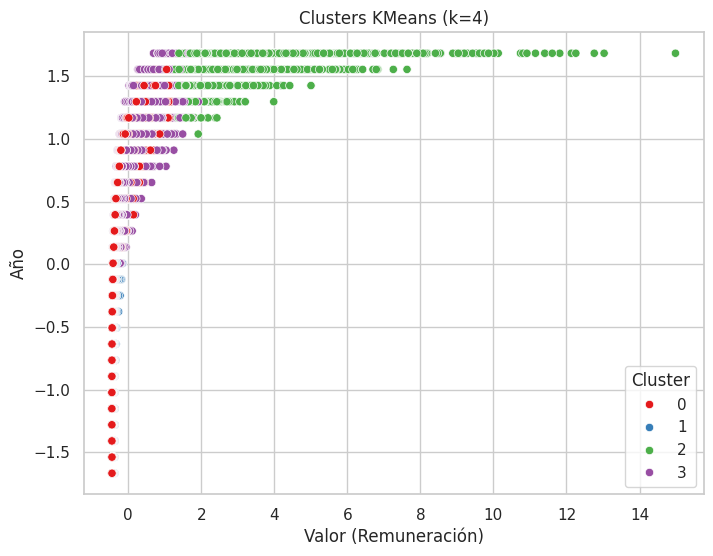

In [77]:
# -----------------------------------------
# Visualizaci√≥n 2D simple
# -----------------------------------------

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_scaled[:, 0],  # 'Valor' escalado
    y=X_scaled[:, 1],  # 'A√±o' escalado
    hue=df_clust['Cluster'],
    palette='Set1'
)
plt.title(f"Clusters KMeans (k={k})")
plt.xlabel('Valor (Remuneraci√≥n)')
plt.ylabel('A√±o')
plt.show()


# **‚úÖ 7. Conclusiones**

## Conclusiones

- Se identificaron **3 clusters** con perfiles salariales diferenciados.
- Cada grupo presenta caracter√≠sticas promedio distintas en remuneraci√≥n, decil y per√≠odo.
- Estos grupos podr√≠an servir para dise√±ar estrategias de compensaci√≥n m√°s equitativas o pol√≠ticas espec√≠ficas.
- Para pr√≥ximos pasos, se recomienda validar resultados con otras variables (edad, nivel educativo) o comparar con algoritmos como DBSCAN.

## Justificaci√≥n

- Se utiliz√≥ **KMeans** por su facilidad de interpretaci√≥n y eficiencia para variables num√©ricas.
- Las variables se escalaron para evitar sesgo por magnitud.
- El n√∫mero de clusters se determin√≥ mediante el **m√©todo del codo**, complementado por el **puntaje de silueta**.


# **Justificaci√≥n metodol√≥gica clara**

***Justificaci√≥n de decisiones tomadas:***

üóÇÔ∏è ‚ÄúSe opt√≥ por un modelo de clustering (K-Means) porque permite agrupar registros de trabajadores/as seg√∫n caracter√≠sticas comunes de remuneraci√≥n, g√©nero y sector, sin necesidad de variable objetivo.
El m√©todo del codo y el √≠ndice silhouette se utilizaron para definir el n√∫mero √≥ptimo de clusters.
Esto complementa los modelos supervisados al explorar segmentos de la poblaci√≥n laboral que podr√≠an requerir intervenciones de pol√≠tica espec√≠ficas para reducir la brecha salarial.‚Äù